In [93]:
suppressPackageStartupMessages(library(monocle))
suppressPackageStartupMessages(library(reshape))

In [81]:
prdata <- readRDS("source/prdata.sagar")
prdata2 <- prdata[rowSums(prdata) > 0,]   # get non-zero genes

In [82]:
rbind(
    dim(prdata),
    dim(prdata2)
)

33901,430
19977,430


In [84]:
load_previous <- T

if (load_previous){
    k <- readRDS("k.biomart.monocle")
} else {
    suppressWarnings(require(biomaRt))
    # Annotate the data before adding SC experiment

    mart <- useMart(biomart = "ENSEMBL_MART_ENSEMBL", 
                    dataset = "mmusculus_gene_ensembl")

    k <- getBM(
        filters = "mgi_symbol",
        attributes = c(
                "mgi_symbol",
    #            "external_transcript_name",     # Transcript-specific name
    #            "gene_biotype",                 # Gene biotype
    #            "transcript_biotype",           # Trans type
                "description",                  # Gene description
    #            "band",                         # Karyotype band
    #            "refseq_mrna",
    #            "go_id",                        # Go Term accession (cellular domains)
    #            "go_linkage_type",              # Go Term evidence code
                "name_1006",                    # Go Term name
    #            "definition_1006",              # Go Term definition
                "namespace_1003"                # Go domain                  
        ),
        values = unique(rownames(prdata)),
        mart = mart
    )
    saveRDS(k, "k.biomart.monocle")   
}

In [85]:
# K is our featureData table, now we must make a phenoData -- although we 
#  know literally nothing except FACS plate and time of extraction
pdata <- colnames(prdata)
batch_number <- as.integer(sub(".*FACS([0-9]+)_.*", "\\1", pdata))
pdata <- data.frame(cbind(pdata, batch_number, "7.25"))
colnames(pdata) <- c("Cell", "Batch", "Time")
head(pdata)

Cell,Batch,Time
SAE725FACS1_1_1,1,7.25
SAE725FACS1_1_2,1,7.25
SAE725FACS1_1_3,1,7.25
SAE725FACS1_1_4,1,7.25
SAE725FACS1_1_5,1,7.25
SAE725FACS1_1_6,1,7.25


In [50]:
#prdata_new <- cbind(rownames(prdata), prdata)
#colnames(prdata_new)[1] <- "gene_short_name"
#head(prdata_new)

### DO THIS HERE
#fData(HSMM) <- cbind(rownames(HSMM), fData(HSMM))
#colnames(fData(HSMM))[1] <- "gene_short_name"
#head(fData(HSMM))

,gene_short_name,SAE725FACS1_1_1,SAE725FACS1_1_2,SAE725FACS1_1_3,SAE725FACS1_1_4,SAE725FACS1_1_5,SAE725FACS1_1_6,SAE725FACS1_1_7,SAE725FACS1_1_8,SAE725FACS1_1_9,⋯,SAE725FACS8_8_129,SAE725FACS8_8_145,SAE725FACS8_8_148,SAE725FACS8_8_154,SAE725FACS8_8_161,SAE725FACS8_8_164,SAE725FACS8_8_169,SAE725FACS8_8_173,SAE725FACS8_8_177,SAE725FACS8_8_180
0610007P14Rik,0610007P14Rik,0.000000,0.000000,1.000122,4.001954,0.000000,1.000122,0,0,0,⋯,2.000488,2.000488,0.000000,0,3.001099,0,0.000000,1.000122,0,1.000122
0610009B22Rik,0610009B22Rik,0.000000,3.001099,4.001954,3.001099,1.000122,4.001954,0,0,0,⋯,4.001954,1.000122,2.000488,0,2.000488,0,1.000122,0.000000,0,1.000122
0610009E02Rik,0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009L18Rik,0610009L18Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009O20Rik,0610009O20Rik,0.000000,1.000122,0.000000,0.000000,0.000000,1.000122,0,0,0,⋯,0.000000,0.000000,0.000000,0,2.000488,0,0.000000,0.000000,0,1.000122
0610010F05Rik,0610010F05Rik,1.000122,0.000000,0.000000,1.000122,0.000000,0.000000,0,0,0,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,1.000122,0,2.000488


In [86]:
#pd <- new("AnnotatedDataFrame", data = pdata)
#fd <- new("AnnotatedDataFrame", data = k)
HSMM <- newCellDataSet(
    #as(as.matrix(prdata), "sparseMatrix"),
    as.matrix(prdata),
    expressionFamily=negbinomial.size())

Warning message in newCellDataSet(as.matrix(prdata), expressionFamily = negbinomial.size()):
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”Warning message in newCellDataSet(as.matrix(prdata), expressionFamily = negbinomial.size()):
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”Warning message in newCellDataSet(as.matrix(prdata), expressionFamily = negbinomial.size()):
“Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions”

In [87]:
HSMM <- estimateSizeFactors(HSMM)
HSMM <- estimateDispersions(HSMM)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step size truncated due to divergence”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”Warning message:
“step s

In [88]:
HSMM <- detectGenes(HSMM, min_expr = 0.1)
head(fData(HSMM))
expressed_genes <- row.names(subset(fData(HSMM),
    num_cells_expressed >= 10))

,num_cells_expressed
0610007P14Rik,231
0610009B22Rik,212
0610009E02Rik,4
0610009L18Rik,3
0610009O20Rik,117
0610010F05Rik,112


In [89]:
head(pData(HSMM))
pData(HSMM)$Total_mRNAs <- Matrix::colSums(exprs(HSMM))

HSMM <- HSMM[,pData(HSMM)$Total_mRNAs < 1e6]

upper_bound <- 10^(mean(log10(pData(HSMM)$Total_mRNAs)) + 2*sd(log10(pData(HSMM)$Total_mRNAs)))
lower_bound <- 10^(mean(log10(pData(HSMM)$Total_mRNAs)) - 2*sd(log10(pData(HSMM)$Total_mRNAs)))

,Size_Factor,num_genes_expressed
SAE725FACS1_1_1,1.8534305,4685
SAE725FACS1_1_2,3.6475624,6709
SAE725FACS1_1_3,3.2656155,6348
SAE725FACS1_1_4,3.7335154,6404
SAE725FACS1_1_5,0.0961356,682
SAE725FACS1_1_6,2.2981700,5592


[1] 226482.7

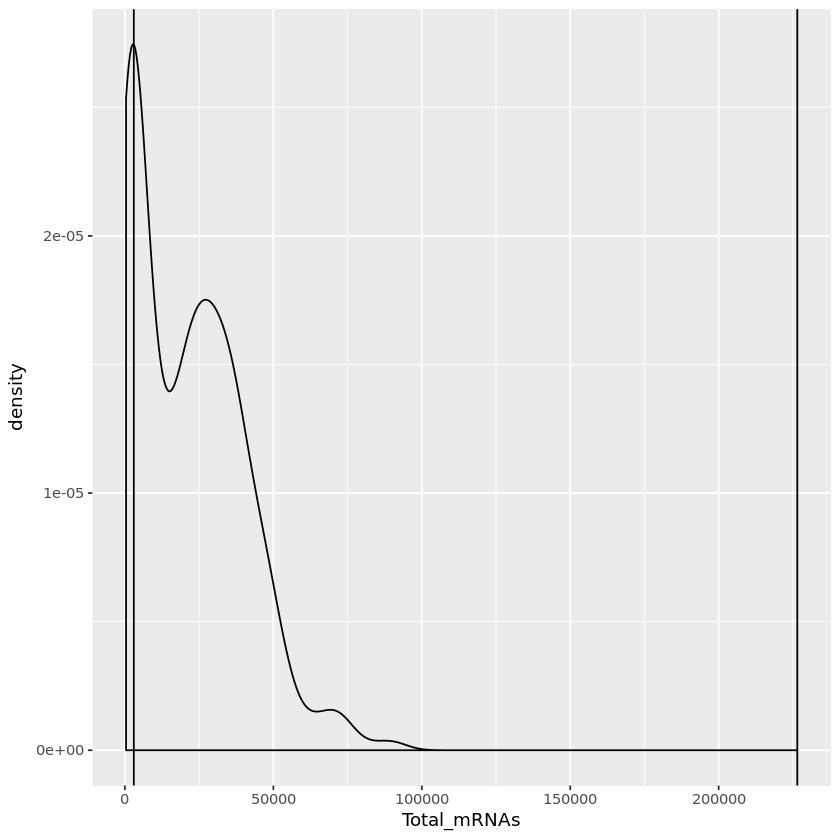

In [90]:
lower_bound <- 3000
upper_bound

qplot(Total_mRNAs, data = pData(HSMM), geom = "density"
) + geom_vline(xintercept = lower_bound) + geom_vline(xintercept = upper_bound)

Warning message:
“Removed 5635150 rows containing non-finite values (stat_density).”

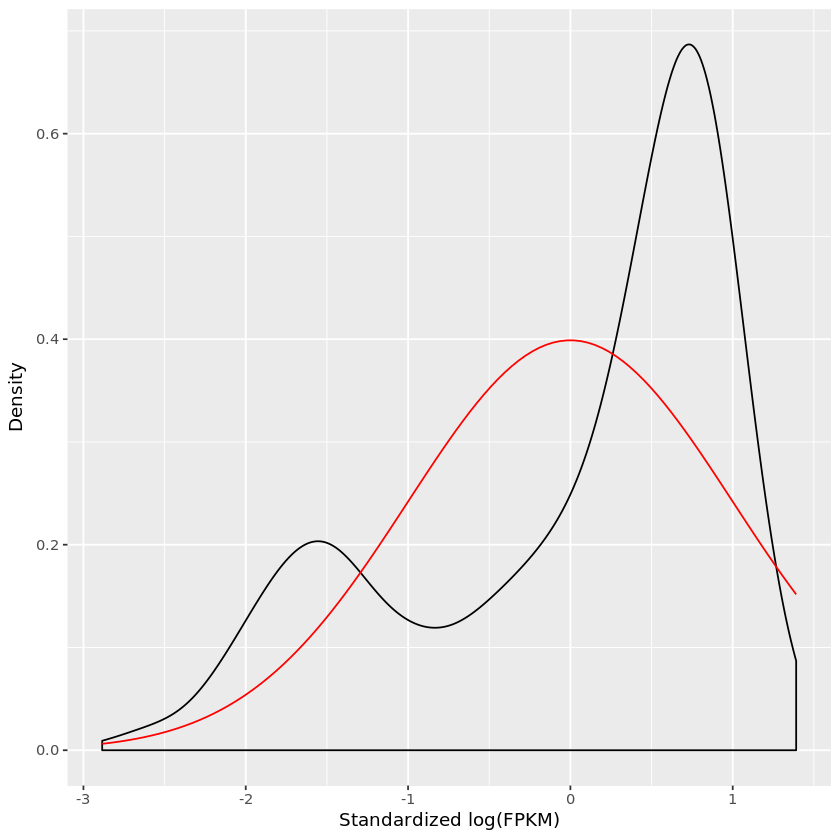

In [94]:

# Log-transform each value in the expression matrix.
L <- log(exprs(HSMM[expressed_genes,]))

# Standardize each gene, so that they are all on the same scale,
# Then melt the data with plyr so we can plot it easily
melted_dens_df <- melt(Matrix::t(scale(Matrix::t(L))))

# Plot the distribution of the standardized gene expression values.
qplot(value, geom = "density", data = melted_dens_df) +
stat_function(fun = dnorm, size = 0.5, color = 'red') +
xlab("Standardized log(FPKM)") +
ylab("Density")

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

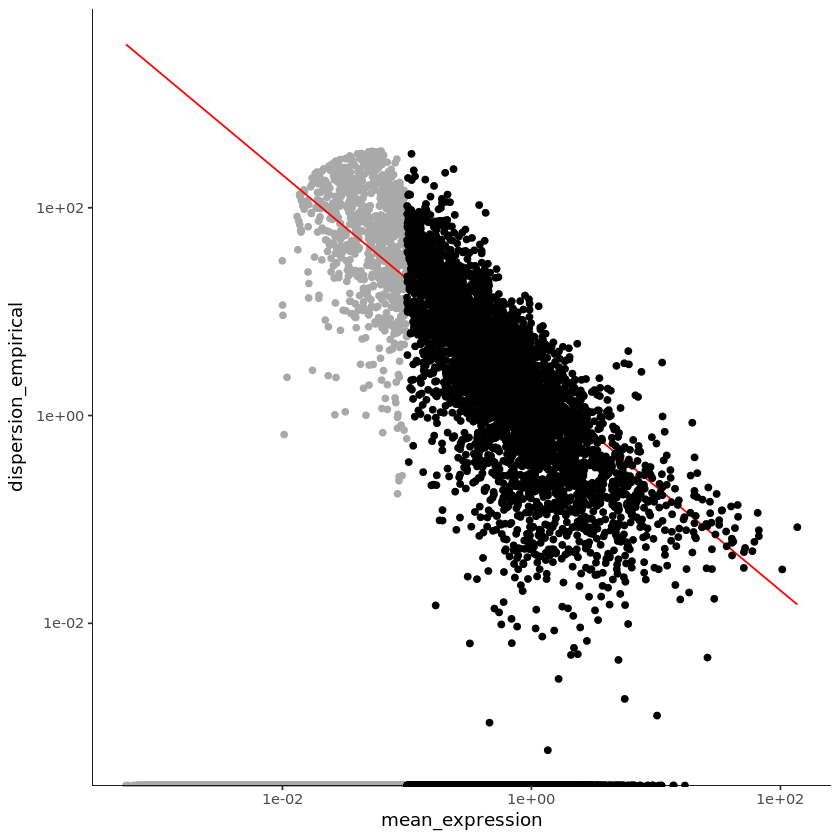

In [96]:
disp_table <- dispersionTable(HSMM)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
HSMM <- setOrderingFilter(HSMM, unsup_clustering_genes$gene_id)
plot_ordering_genes(HSMM)

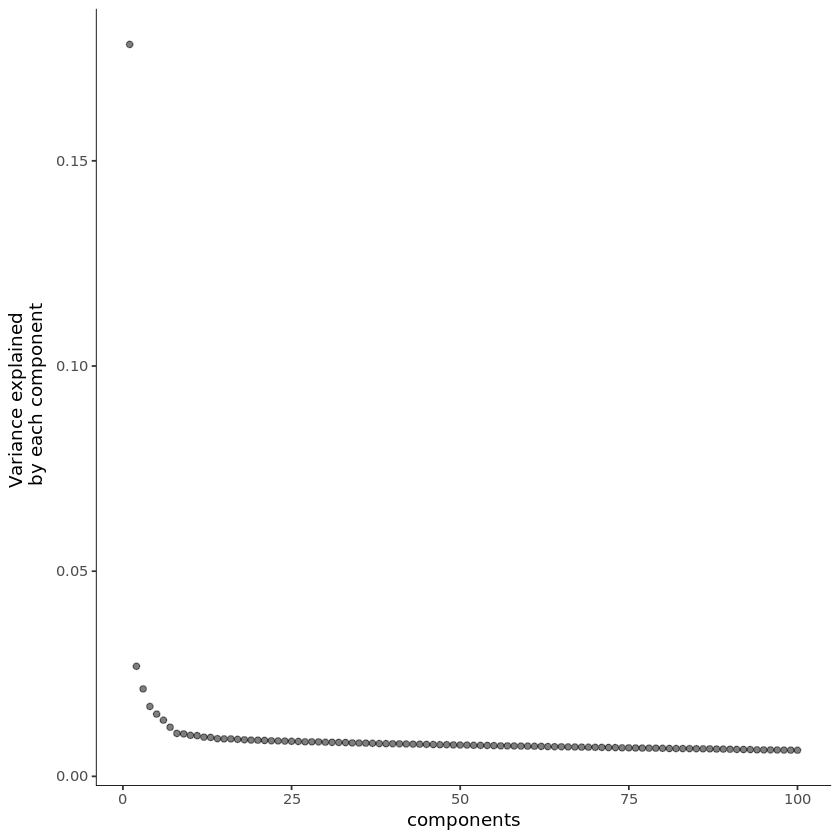

In [97]:
plot_pc_variance_explained(HSMM, return_all = F) # norm_method='log'

Distance cutoff calculated to 1.563153 


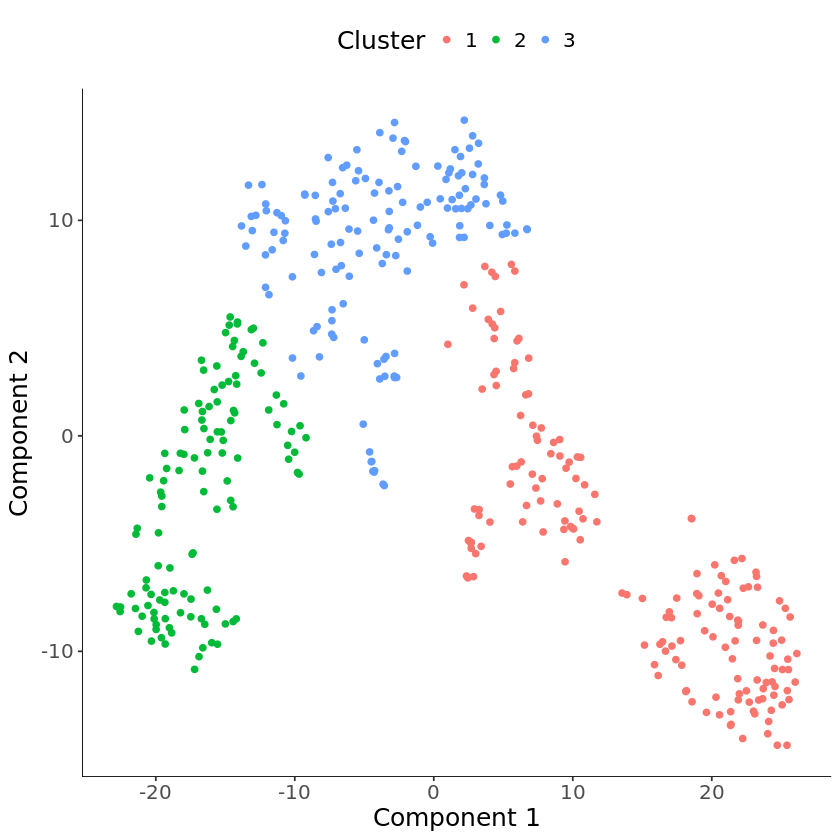

In [105]:
HSMM <- reduceDimension(HSMM)
HSMM <- clusterCells(HSMM)
gene_list <- c("T", "Eomes", "Mesp1", "Pou5f1", "Nanog", "Sox1", "Sox2", "Pou3f1", "Zfp462", "Slc7a3")
plot_cell_clusters(HSMM, 1, 2, markers = gene_list)

In [107]:
disp_table <- dispersionTable(HSMM)
ordering_genes <- subset(disp_table, mean_expression >= 0.1)
HSMM <- setOrderingFilter(HSMM, ordering_genes)
HSMM <- reduceDimension(HSMM)
HSMM <- orderCells(HSMM)

In [109]:
diff_test_res <- differentialGeneTest(HSMM)
sig_genes <- subset(diff_test_res, qval < 0.1)

In [194]:
#head(sig_genes[qval < 1e-20])
t(subset(sig_genes,qval < 1e-20)[,c("pval","num_cells_expressed")])

,Aldh1a2,Bicc1,Cct8,Chrd,Cox7c,Dgkk,Dnmt3b,Eef1b2,Emb,Fkbp4,⋯,Rps13,Rps14,Rps24,Rps25,Rps3a1,Rps6,Rpsa,T,Tppp3,Tpt1
pval,4.943957e-24,5.806056e-25,1.278486e-25,1.792887e-26,4.4564e-24,1.851325e-42,4.835731e-39,2.886359e-62,2.159844e-48,1.67068e-29,⋯,3.584036e-47,5.230162e-55,1.086155e-41,6.962668e-44,1.360597e-26,1.287053e-49,5.242318e-67,8.7366e-172,7.344e-32,2.750665e-42
num_cells_expressed,1.120000e+02,9.100000e+01,3.980000e+02,4.200000e+01,3.9100e+02,1.760000e+02,3.790000e+02,4.230000e+02,3.810000e+02,4.03000e+02,⋯,4.140000e+02,3.990000e+02,4.150000e+02,4.070000e+02,4.230000e+02,4.300000e+02,4.290000e+02,2.5300e+02,2.500e+01,4.170000e+02


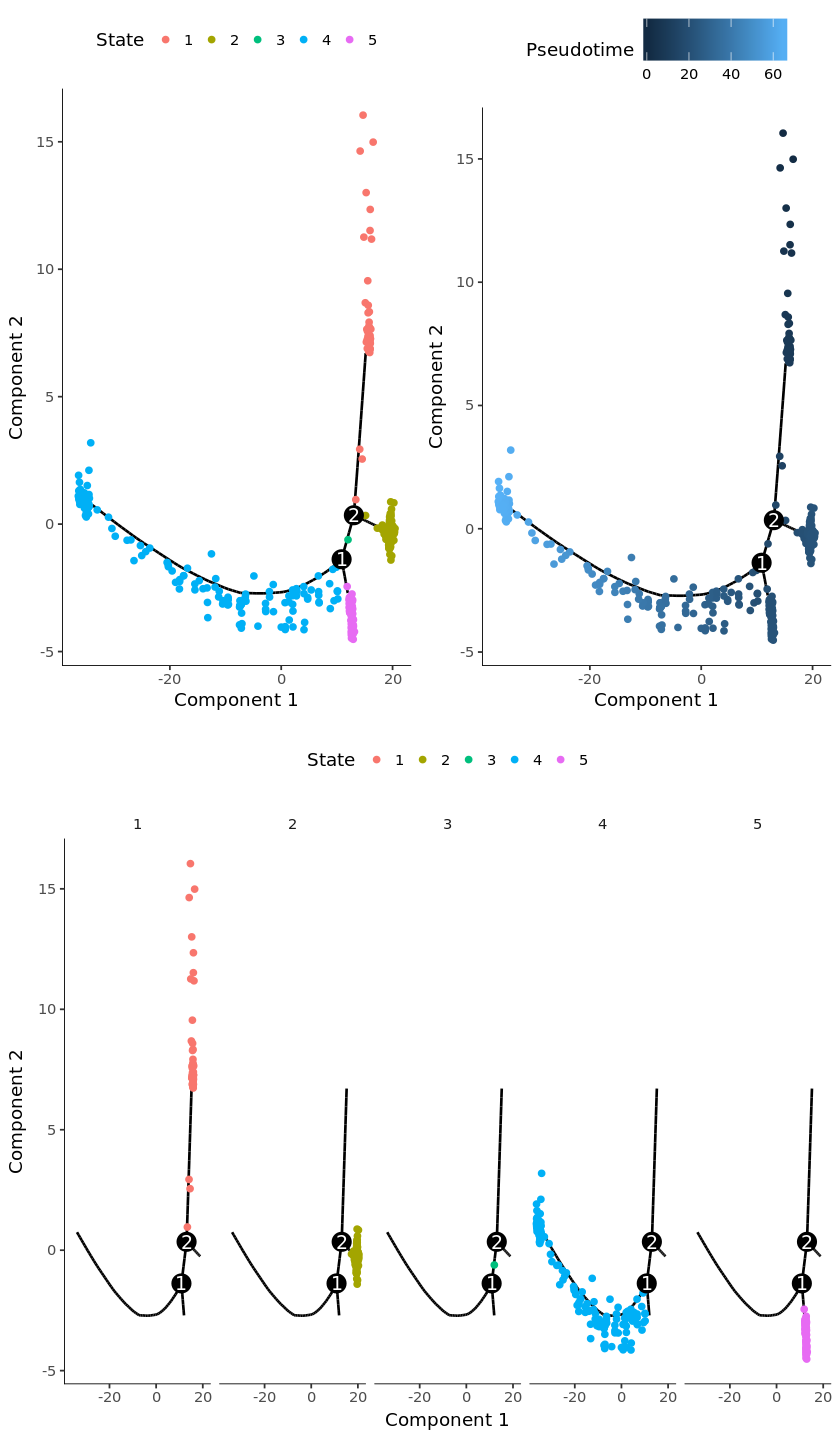

In [195]:
suppressPackageStartupMessages(library(gridExtra))
p1 <- plot_cell_trajectory(HSMM)
p2 <- plot_cell_trajectory(HSMM, color_by = "Pseudotime")
p3 <- plot_cell_trajectory(HSMM) + facet_wrap(~State, nrow = 1)

grid.arrange(p1, p2, p3, layout_matrix = rbind(c(1,2),c(3,3)))


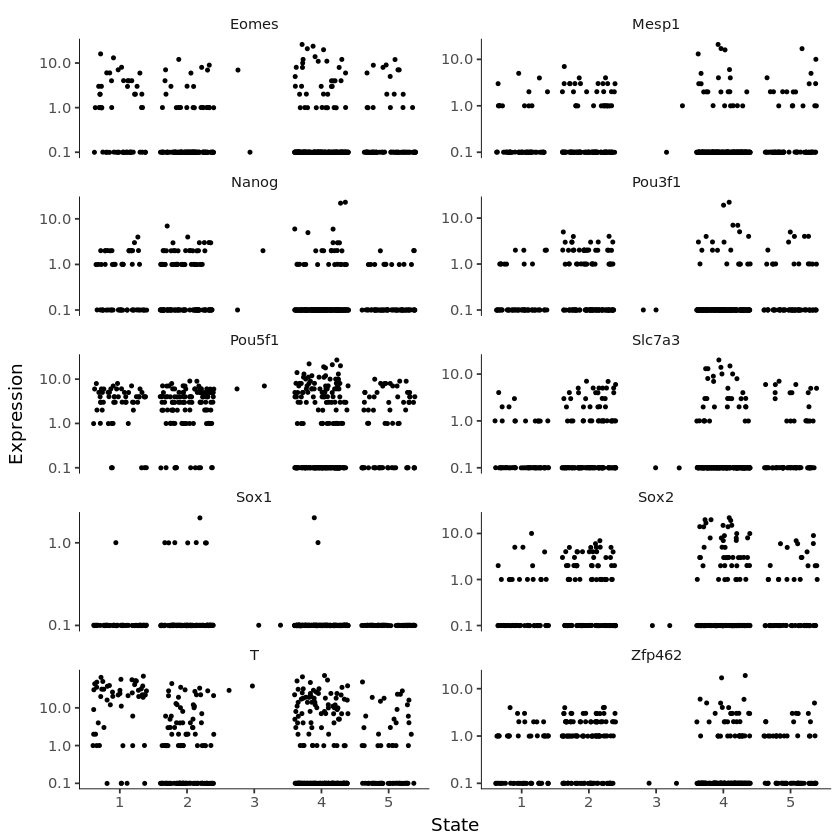

In [138]:
#fData(HSMM) <- cbind(rownames(HSMM), fData(HSMM))
#colnames(fData(HSMM))[1] <- "gene_short_name"
#head(fData(HSMM))

subgenes <- HSMM[row.names(subset(fData(HSMM),
              gene_short_name %in% gene_list)),]
plot_genes_jitter(subgenes, ncol= 2)


In [172]:
sig_genes_highrel <- row.names(subset(sig_genes,qval < 1e-20))
sig_genes_with_extras <- sort(unique(c(sig_genes_highrel, gene_list)))

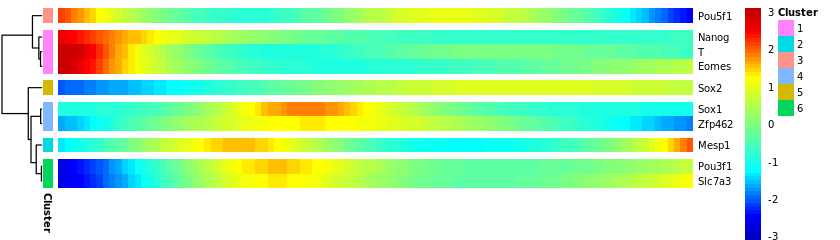

In [173]:
options(repr.plot.height=2)
plot_pseudotime_heatmap(HSMM[gene_list,], show_rownames = T)

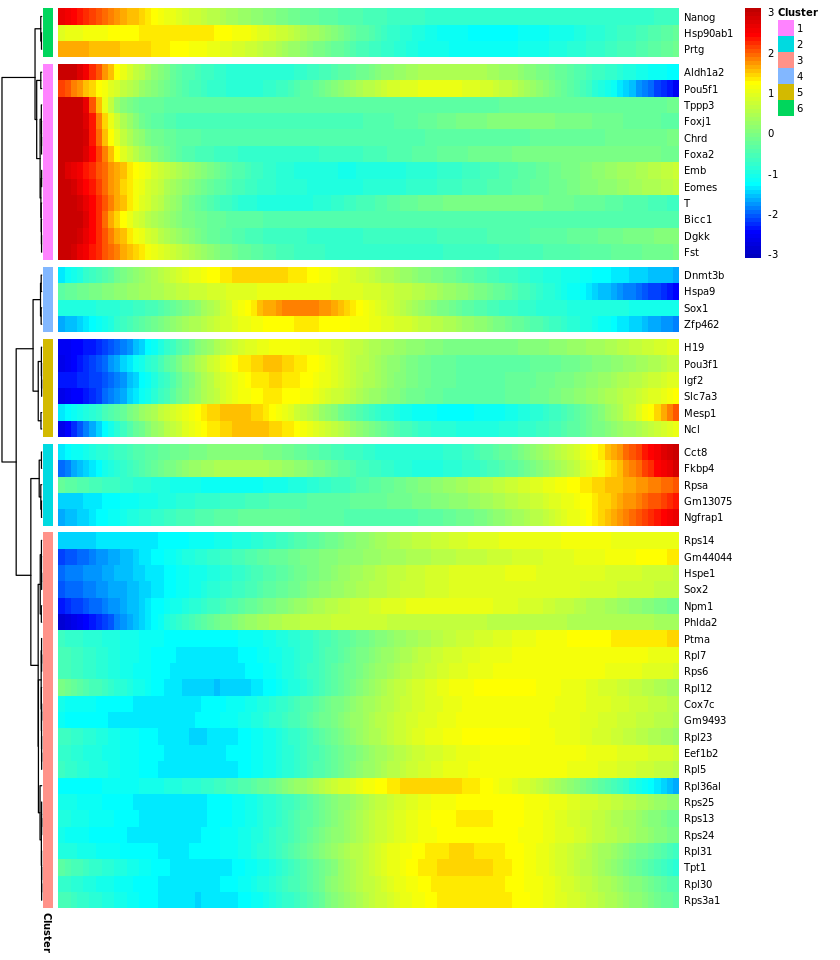

In [174]:
options(repr.plot.height=8)
plot_pseudotime_heatmap(HSMM[sig_genes_with_extras,], show_rownames = T)

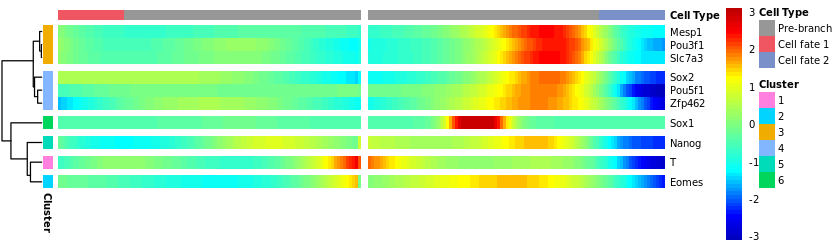

In [183]:
options(repr.plot.height = 2)

plot_genes_branched_heatmap(
    HSMM[gene_list,],
#    branch_point = 1,
#    num_clusters = 4,
    use_gene_short_name = T,
    show_rownames = T
)

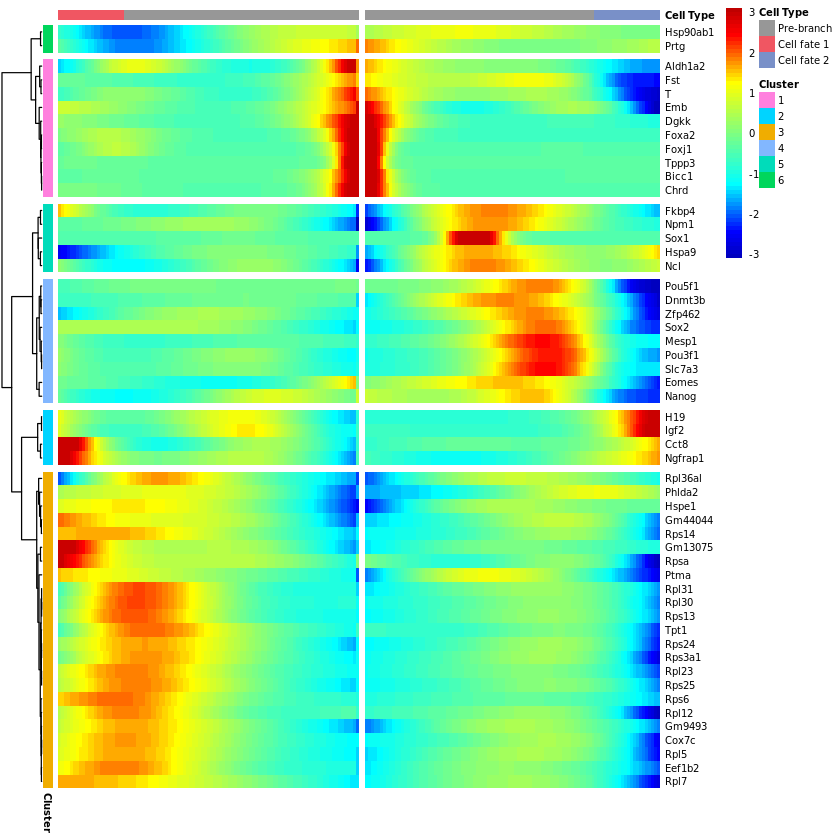

In [185]:
options(repr.plot.height=7)

plot_genes_branched_heatmap(
    HSMM[sig_genes_with_extras,],
#    branch_point = 1,
#    num_clusters = 4,
    use_gene_short_name = T,
    show_rownames = T
)

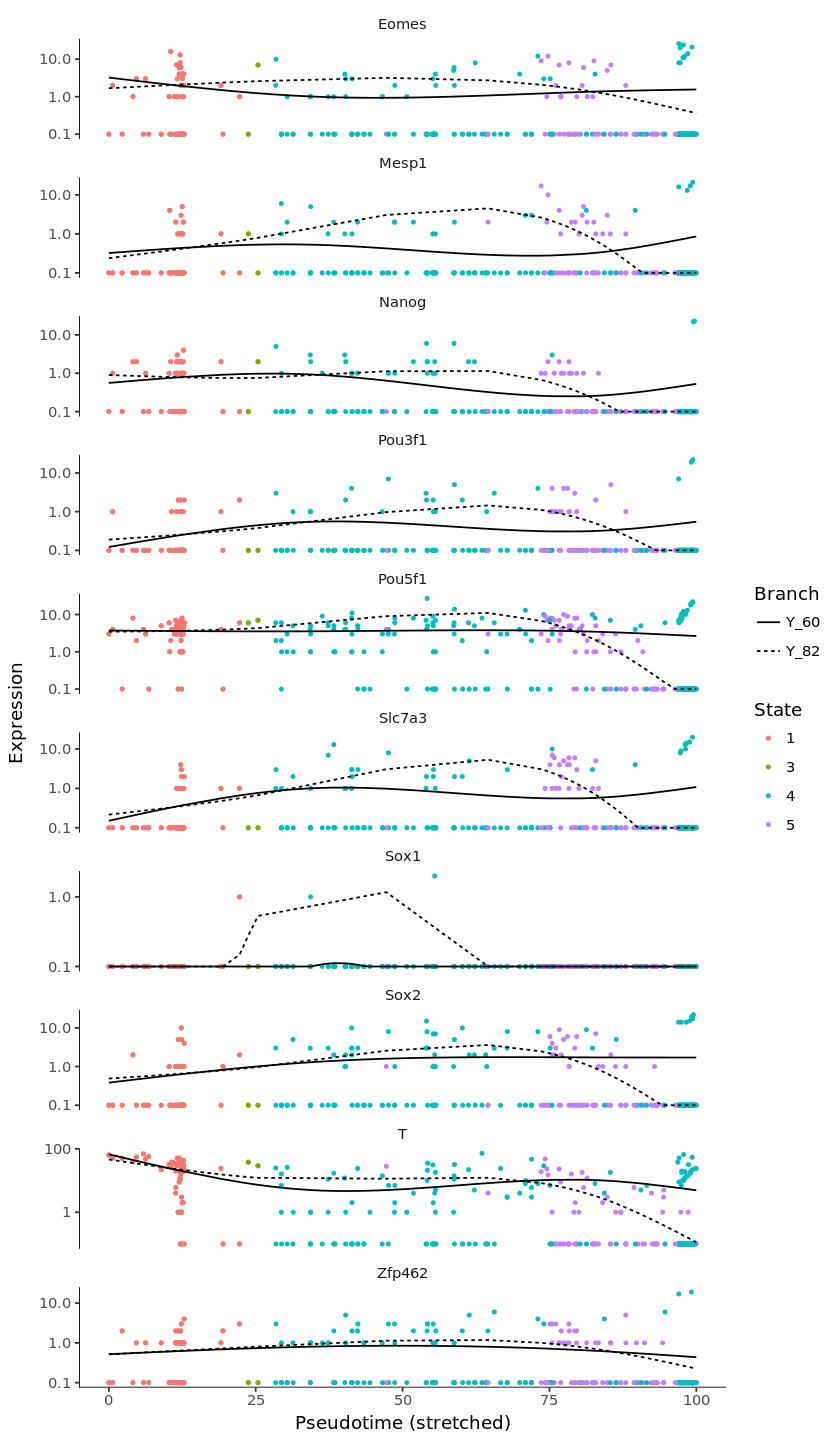

In [190]:
options(repr.plot.height = 12)
plot_genes_branched_pseudotime(HSMM[gene_list,])